## Nicolas Soares dos Santos

# Projeto Final

In [168]:
#Importando Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import unicodedata
import numpy as np

In [ ]:
#Limpando Dataset

df = pd.read_csv('vgsales.csv')
df.info()
df['ano'] = pd.to_numeric(df['ano'],errors = 'coerce')
df['nome'] = df['nome'].str.lower().str.strip()
df['plataforma'] = df['plataforma'].str.lower().str.strip()
df['genero'] = df['genero'].str.lower().str.strip()
df['editor'] = df['editor'].str.lower().str.strip()
df.loc[df['ano'] > 2015, 'vendas_global'] = np.nan
df = df.dropna(subset = ['rank','nome','plataforma','ano','genero','vendas_na','vendas_eu','vendas_jp','outras_vendas','vendas_global'])
df['ano'] = df['ano'].apply(int).astype(int)
def remover_acentos(texto):
    if isinstance(texto,str):
        normalized = unicodedata.normalize('NFKD',texto)
        return normalized.encode('ascii','ignore').decode('utf-8')
    return texto

#retirando acentos e cedilhas dos dados

for coluna in df.columns:
    df[coluna] = df[coluna].apply(remover_acentos)   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           16598 non-null  int64  
 1   nome           16598 non-null  object 
 2   plataforma     16598 non-null  object 
 3   ano            16327 non-null  float64
 4   genero         16598 non-null  object 
 5   editor         16540 non-null  object 
 6   vendas_na      16598 non-null  float64
 7   vendas_eu      16598 non-null  float64
 8   vendas_jp      16598 non-null  float64
 9   outras_vendas  16598 non-null  float64
 10  vendas_global  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 15979 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           15979 non-null  int64  
 1   nome           1

## Pergunta 1: O gênero mais vendido mundialmente é o mesmo das regiões (EU, NA, JP)

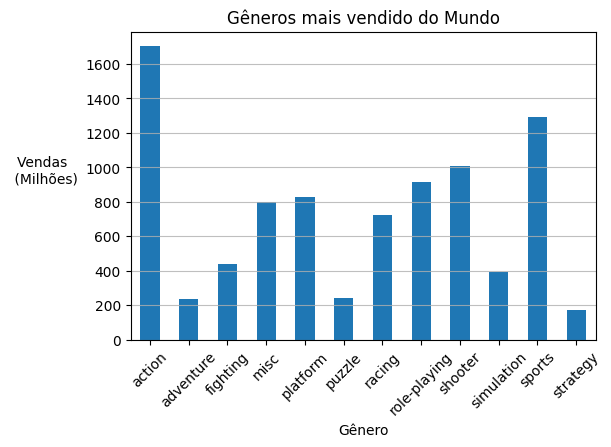

In [170]:
# Fazendo gráfico Global

mundo = df.groupby('genero')['vendas_global'].sum()

plt.figure(figsize = (6,4))
mundo.plot(kind = 'bar', color = 'tab:blue')
plt.title('Gêneros mais vendido do Mundo')
plt.xlabel('Gênero')
plt.xticks(rotation=45)
plt.ylabel('Vendas (Milhões)')
plt.ylabel('Vendas \n (Milhões)', rotation = 0, labelpad = 30)
plt.grid(True, axis='y', alpha = 0.8)
plt.show()

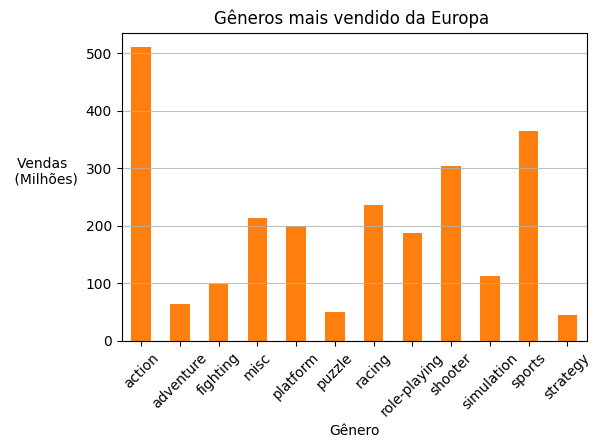

In [171]:
# Fazendo grafico Europeu

europa = df.groupby('genero')['vendas_eu'].sum()

plt.figure(figsize = (6,4))
europa.plot(kind = 'bar', color = 'tab:orange')
plt.title('Gêneros mais vendido da Europa ')
plt.xlabel('Gênero')
plt.xticks(rotation = 45)
plt.ylabel('Vendas \n (Milhões)', rotation = 0, labelpad = 30)
plt.grid(True, axis='y', alpha = 0.8)
plt.show()

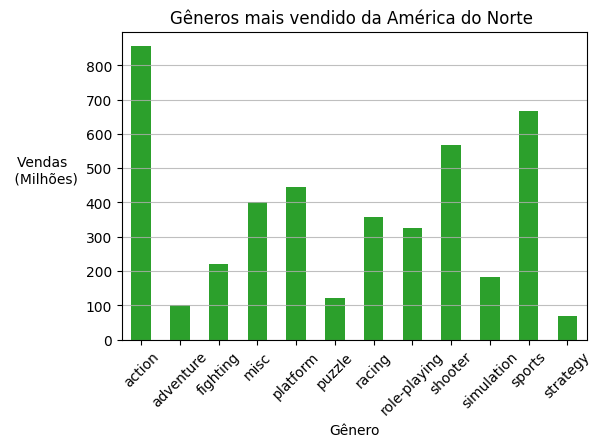

In [172]:
# Fazendo grafico América do Norte

norte_america = df.groupby('genero')['vendas_na'].sum()

plt.figure(figsize = (6,4))
norte_america.plot(kind = 'bar', color = 'tab:green')
plt.title('Gêneros mais vendido da América do Norte ')
plt.xlabel('Gênero')
plt.xticks(rotation=45)
plt.ylabel('Vendas \n (Milhões)', rotation = 0, labelpad = 30)
plt.grid(True, axis='y', alpha = 0.8)
plt.show()

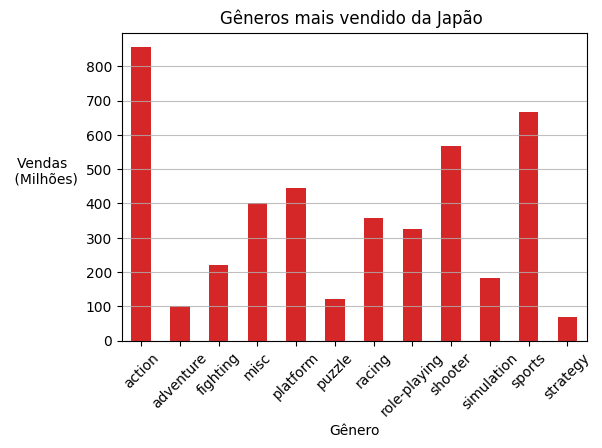

In [173]:
# Fazendo grafico Japão

japao = df.groupby('genero')['vendas_jp'].sum()

plt.figure(figsize = (6,4))
norte_america.plot(kind = 'bar', color = 'tab:red')
plt.title('Gêneros mais vendido da Japão ')
plt.xlabel('Gênero')
plt.xticks(rotation=45)
plt.ylabel('Vendas \n (Milhões)', rotation = 0, labelpad = 30)
plt.grid(True, axis='y', alpha = 0.8)
plt.show()

### Correlação ou Causalidade: Mesmo sendo regiões diferentes os gráficos são bem semelhantes, mas tem três que se destacam bastante que é Action, Shooter e sports. Nessa situação seria causalidade, porque esses gêneros se destacam tanto do demais no gráfico, que não faria sentido ter um resultado diferente nos gráficos das demais regiões

- ### Obs: Mesmo que os jogos japoneses são os mais vendidos o jãpao foi quase sempre o que teve menos vendas

## Pergunta 2: Houve um grande aumento de vendas com passar do tempo?

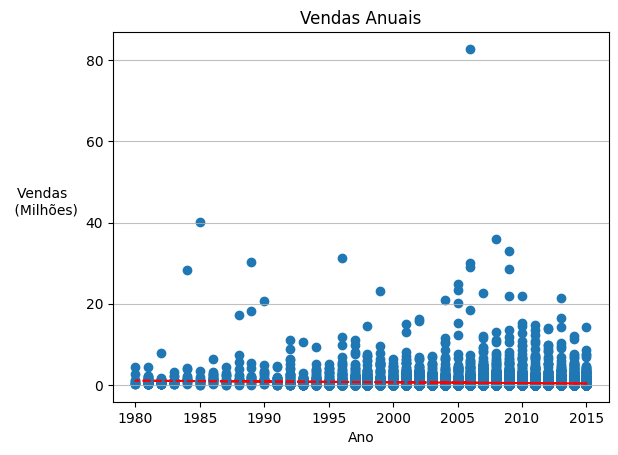

In [174]:
#Fazendo gráfico de vendas anuais

aumento_de_vendas = df.groupby('ano')['vendas_global'].sum()
vendas_globais = df['vendas_global']
anos = df['ano']
plt.scatter(anos, vendas_globais)

coeficientes = np.polyfit(anos, vendas_globais, 1)
funcao_tendencia = np.poly1d(coeficientes)

plt.plot(anos, funcao_tendencia(anos),color = 'red', linestyle = '--')
plt.title('Vendas Anuais')
plt.xlabel('Ano')
plt.ylabel('Vendas \n (Milhões)', rotation = 0, labelpad = 30)
plt.grid(True, axis = 'y', alpha = 0.8)
plt.show()

### Correlação ou Causalidade: De acordo com o gráfico essa pergunta se encaixa numa Causalidade porque com o passar dos anos e perceptivel que ouve um aumento de jogos que venderam milhões 

#### Conclusão: A pergunta 1 tinha o objetivo de ver se existem generos que predominam no mercado de jogos; já a 2 era pra ver se com o passar dos tempos o mercado de jogos ouve um aumento de vendas. Para limpeza foi necessario deixar tudo minusculo, tirar acentos e cedilhas e tirar espaço desnecessario para evitar possivel problemas; foi transformado todos os números da coluna "ano" em números inteiros, apenas por estetica; os jogos que lançaram a partir de 2015 foram retirados por serem poucos, oque acabava atrapalhando com a analise dos graficos e por fim foi retirado as linhas onde tinha dados ausentes para evitar problemas. Na pergunta 1 escolhi as colunas de vendas e de genero, para que possa ver quanto cada genero vendeu em cada região; na 2 escolhi a coluna de ano e de vendas globais, para descobrir quanto os jogos venderam em cada ano. Na pergunta 1 foi feito 4 graficos onde cada um fala quanto cada genero vendeu em cada região, para poder comparar os generos mais vendidos de cada lugar; já a 2 foi feito um grafico para ver as vendas anuais, facilitando ver se ouve um aumento das vendas com o passar dos anos. Ambas das perguntas foram respondidas, onde a primeira foi respondida que quando um genero se destaca mundialmente nas vendas, eles tambem se destacam em regiões menores(EUA, Japão e América do Norte); e a segunda também foi respondida que com o passar dos anos os jogos vão vender mais